In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 150)

In [3]:
df = pd.read_csv('ESP_cause_sex_deaths_1980-2020.csv', sep = ';', thousands = '.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Causa de muerte  2214 non-null   object
 1   Sexo             2214 non-null   object
 2   Edad             2214 non-null   object
 3   Periodo          2214 non-null   int64 
 4   Total            2214 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 86.6+ KB


In [4]:
df.head()

,Causa de muerte,Sexo,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2020,493776
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2019,418703
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611


In [5]:
df.drop(['Edad'], axis=1, inplace=True)

In [6]:
df['Causa de muerte'].unique()

array(['001-102  I-XXII.Todas las causas',
       '001-008  I.Enfermedades infecciosas y parasitarias',
       '009-041  II.Tumores',
       '042-043  III.Enfermedades de la sangre y de los organos hematopoyeticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
       '044-045  IV.Enfermedades endocrinas, nutricionales y metabolicas',
       '046-049  V.Trastornos mentales y del comportamiento',
       '050-052  VI-VIII.Enfermedades del sistema nervioso y de los organos de los sentidos',
       '053-061 IX.Enfermedades del sistema circulatorio',
       '062-067  X.Enfermedades del sistema respiratorio',
       '068-072  XI.Enfermedades del sistema digestivo',
       '073  XII.Enfermedades de la piel y del tejido subcutoneo',
       '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo',
       '077-080  XIV.Enfermedades del sistema genitourinario',
       '081  XV.Embarazo, parto y puerperio',
       '082  XVI.Afecciones originadas en el periodo

In [7]:
df_todas_causas = df[df['Causa de muerte'] == '001-102  I-XXII.Todas las causas']
df_todas_causas_t = df_todas_causas[df_todas_causas['Sexo'] == 'Total']
df_todas_causas_h = df_todas_causas[df_todas_causas['Sexo'] == 'Hombres']
df_todas_causas_m = df_todas_causas[df_todas_causas['Sexo'] == 'Mujeres']

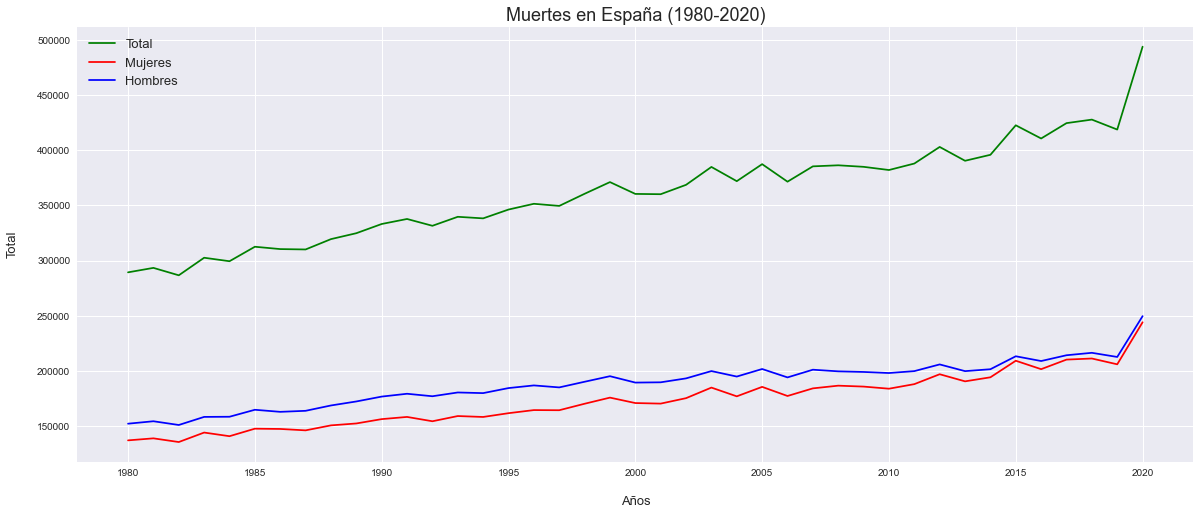

In [8]:
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
plt.plot(df_todas_causas_t['Periodo'], df_todas_causas_t['Total'], linestyle = '-', color = 'g', label='Total')
plt.plot(df_todas_causas_m['Periodo'], df_todas_causas_m['Total'], linestyle = '-', color = 'r', label='Mujeres')
plt.plot(df_todas_causas_h['Periodo'], df_todas_causas_h['Total'], linestyle = '-', color = 'b', label='Hombres')
plt.legend(loc='upper left', fontsize=13);
plt.title('Muertes en España (1980-2020)', fontsize=18)
plt.xlabel('Años', size=13, labelpad=18)
plt.ylabel('Total', size=13, labelpad=18);

In [9]:
df_todas_causas_1980 = df[(df['Causa de muerte'] == '001-102  I-XXII.Todas las causas') & (df['Periodo'] == 1980)]
df_todas_causas_2020 = df[(df['Causa de muerte'] == '001-102  I-XXII.Todas las causas') & (df['Periodo'] == 2020)]
df_todas_causas_80_20 = pd.concat([df_todas_causas_1980, df_todas_causas_2020])
df_todas_causas_80_20.head(6)

,Causa de muerte,Sexo,Periodo,Total
40,001-102 I-XXII.Todas las causas,Total,1980,289344
81,001-102 I-XXII.Todas las causas,Mujeres,1980,137119
122,001-102 I-XXII.Todas las causas,Hombres,1980,152225
0,001-102 I-XXII.Todas las causas,Total,2020,493776
41,001-102 I-XXII.Todas las causas,Mujeres,2020,244112
82,001-102 I-XXII.Todas las causas,Hombres,2020,249664


In [10]:
infecciosas = df[df['Causa de muerte'] ==  '001-008  I.Enfermedades infecciosas y parasitarias']
infecciosas_t = infecciosas[(infecciosas['Sexo']=='Total')&(infecciosas['Periodo']>2015)]
infecciosas_t

,Causa de muerte,Sexo,Periodo,Total
123,001-008 I.Enfermedades infecciosas y parasita...,Total,2020,80796
124,001-008 I.Enfermedades infecciosas y parasita...,Total,2019,6119
125,001-008 I.Enfermedades infecciosas y parasita...,Total,2018,6398
126,001-008 I.Enfermedades infecciosas y parasita...,Total,2017,6819
127,001-008 I.Enfermedades infecciosas y parasita...,Total,2016,7033


In [33]:
infecciosas = df[df['Causa de muerte'] ==  '001-008  I.Enfermedades infecciosas y parasitarias']
infecciosas_t = infecciosas[(infecciosas['Sexo']=='Total')&(infecciosas['Periodo'] == 2000)]
infecciosas_t

,Causa de muerte,Sexo,Periodo,Total
143,001-008 I.Enfermedades infecciosas y parasita...,Total,2000,6284


In [11]:
tumores = df[df['Causa de muerte'] == '009-041  II.Tumores']
tumores_t = tumores[(tumores['Sexo']=='Total')&(tumores['Periodo']>2015)]
tumores_t

,Causa de muerte,Sexo,Periodo,Total
246,009-041 II.Tumores,Total,2020,112741
247,009-041 II.Tumores,Total,2019,113059
248,009-041 II.Tumores,Total,2018,112714
249,009-041 II.Tumores,Total,2017,113266
250,009-041 II.Tumores,Total,2016,112939


In [12]:
sangre = df[df['Causa de muerte'] == '042-043  III.Enfermedades de la sangre y de los organos hematopoyeticos, y ciertos trastornos que afectan al mecanismo de la inmunidad']
sangre_t = sangre[(sangre['Sexo']=='Total')&(sangre['Periodo']>2015)]
sangre_t

,Causa de muerte,Sexo,Periodo,Total
369,042-043 III.Enfermedades de la sangre y de lo...,Total,2020,2062
370,042-043 III.Enfermedades de la sangre y de lo...,Total,2019,2012
371,042-043 III.Enfermedades de la sangre y de lo...,Total,2018,1946
372,042-043 III.Enfermedades de la sangre y de lo...,Total,2017,1973
373,042-043 III.Enfermedades de la sangre y de lo...,Total,2016,1886


In [13]:
endocrinas = df[df['Causa de muerte'] == '044-045  IV.Enfermedades endocrinas, nutricionales y metabolicas']
endocrinas_t = endocrinas[(endocrinas['Sexo']=='Total')&(endocrinas['Periodo']>2015)]
endocrinas_t

,Causa de muerte,Sexo,Periodo,Total
492,"044-045 IV.Enfermedades endocrinas, nutricion...",Total,2020,15290
493,"044-045 IV.Enfermedades endocrinas, nutricion...",Total,2019,13351
494,"044-045 IV.Enfermedades endocrinas, nutricion...",Total,2018,13465
495,"044-045 IV.Enfermedades endocrinas, nutricion...",Total,2017,13296
496,"044-045 IV.Enfermedades endocrinas, nutricion...",Total,2016,12700


In [14]:
trast_mentales = df[df['Causa de muerte'] == '046-049  V.Trastornos mentales y del comportamiento']
trast_mentales_t = trast_mentales[(trast_mentales['Sexo']=='Total')&(trast_mentales['Periodo']>2015)]
trast_mentales_t

,Causa de muerte,Sexo,Periodo,Total
615,046-049 V.Trastornos mentales y del comportam...,Total,2020,21697
616,046-049 V.Trastornos mentales y del comportam...,Total,2019,22896
617,046-049 V.Trastornos mentales y del comportam...,Total,2018,22376
618,046-049 V.Trastornos mentales y del comportam...,Total,2017,21722
619,046-049 V.Trastornos mentales y del comportam...,Total,2016,20980


In [15]:
sist_nerv_y_sentidos = df[df['Causa de muerte'] == '050-052  VI-VIII.Enfermedades del sistema nervioso y de los organos de los sentidos']
sist_nerv_y_sentidos_t = sist_nerv_y_sentidos[(sist_nerv_y_sentidos['Sexo']=='Total')&(sist_nerv_y_sentidos['Periodo']>2015)]
sist_nerv_y_sentidos_t

,Causa de muerte,Sexo,Periodo,Total
738,050-052 VI-VIII.Enfermedades del sistema nerv...,Total,2020,27508
739,050-052 VI-VIII.Enfermedades del sistema nerv...,Total,2019,26120
740,050-052 VI-VIII.Enfermedades del sistema nerv...,Total,2018,26279
741,050-052 VI-VIII.Enfermedades del sistema nerv...,Total,2017,26345
742,050-052 VI-VIII.Enfermedades del sistema nerv...,Total,2016,25236


In [16]:
sist_circulatorio = df[df['Causa de muerte'] == '053-061 IX.Enfermedades del sistema circulatorio']
sist_circulatorio_t = sist_circulatorio[(sist_circulatorio['Sexo']=='Total')&(sist_circulatorio['Periodo']>2015)]
sist_circulatorio_t

,Causa de muerte,Sexo,Periodo,Total
861,053-061 IX.Enfermedades del sistema circulatorio,Total,2020,119853
862,053-061 IX.Enfermedades del sistema circulatorio,Total,2019,116615
863,053-061 IX.Enfermedades del sistema circulatorio,Total,2018,120859
864,053-061 IX.Enfermedades del sistema circulatorio,Total,2017,122465
865,053-061 IX.Enfermedades del sistema circulatorio,Total,2016,119778


In [17]:
sist_respiratorio = df[df['Causa de muerte'] == '062-067  X.Enfermedades del sistema respiratorio']
sist_respiratorio_t = sist_respiratorio[(sist_respiratorio['Sexo']=='Total')&(sist_respiratorio['Periodo']>2015)]
sist_respiratorio_t

,Causa de muerte,Sexo,Periodo,Total
984,062-067 X.Enfermedades del sistema respiratorio,Total,2020,42423
985,062-067 X.Enfermedades del sistema respiratorio,Total,2019,47681
986,062-067 X.Enfermedades del sistema respiratorio,Total,2018,53687
987,062-067 X.Enfermedades del sistema respiratorio,Total,2017,51615
988,062-067 X.Enfermedades del sistema respiratorio,Total,2016,46812


In [18]:
sist_digestivo = df[df['Causa de muerte'] == '068-072  XI.Enfermedades del sistema digestivo']
sist_digestivo_t = sist_digestivo[(sist_digestivo['Sexo']=='Total')&(sist_digestivo['Periodo']>2015)]
sist_digestivo_t

,Causa de muerte,Sexo,Periodo,Total
1107,068-072 XI.Enfermedades del sistema digestivo,Total,2020,21565
1108,068-072 XI.Enfermedades del sistema digestivo,Total,2019,22038
1109,068-072 XI.Enfermedades del sistema digestivo,Total,2018,21689
1110,068-072 XI.Enfermedades del sistema digestivo,Total,2017,20447
1111,068-072 XI.Enfermedades del sistema digestivo,Total,2016,20096


In [19]:
piel = df[df['Causa de muerte'] == '073  XII.Enfermedades de la piel y del tejido subcutoneo']
piel_t = piel[(piel['Sexo']=='Total')&(piel['Periodo']>2015)]
piel_t

,Causa de muerte,Sexo,Periodo,Total
1230,073 XII.Enfermedades de la piel y del tejido ...,Total,2020,1902
1231,073 XII.Enfermedades de la piel y del tejido ...,Total,2019,1775
1232,073 XII.Enfermedades de la piel y del tejido ...,Total,2018,1826
1233,073 XII.Enfermedades de la piel y del tejido ...,Total,2017,1691
1234,073 XII.Enfermedades de la piel y del tejido ...,Total,2016,1523


In [20]:
sist_osteomuscular = df[df['Causa de muerte'] == '074-076  XIII.Enfermedades del sistema osteomuscular y del tejido conjuntivo']
sist_osteomuscular_t = sist_osteomuscular[(sist_osteomuscular['Sexo']=='Total')&(sist_osteomuscular['Periodo']>2015)]
sist_osteomuscular_t

,Causa de muerte,Sexo,Periodo,Total
1353,074-076 XIII.Enfermedades del sistema osteomu...,Total,2020,5225
1354,074-076 XIII.Enfermedades del sistema osteomu...,Total,2019,5162
1355,074-076 XIII.Enfermedades del sistema osteomu...,Total,2018,5205
1356,074-076 XIII.Enfermedades del sistema osteomu...,Total,2017,5070
1357,074-076 XIII.Enfermedades del sistema osteomu...,Total,2016,4256


In [21]:
sist_genitourinario = df[df['Causa de muerte'] == '077-080  XIV.Enfermedades del sistema genitourinario']
sist_genitourinario_t = sist_genitourinario[(sist_genitourinario['Sexo']=='Total')&(sist_genitourinario['Periodo']>2015)]
sist_genitourinario_t

,Causa de muerte,Sexo,Periodo,Total
1476,077-080 XIV.Enfermedades del sistema genitour...,Total,2020,15810
1477,077-080 XIV.Enfermedades del sistema genitour...,Total,2019,14123
1478,077-080 XIV.Enfermedades del sistema genitour...,Total,2018,13941
1479,077-080 XIV.Enfermedades del sistema genitour...,Total,2017,13188
1480,077-080 XIV.Enfermedades del sistema genitour...,Total,2016,12173


In [22]:
embarazo_parto = df[df['Causa de muerte'] == '081  XV.Embarazo, parto y puerperio']
embarazo_parto_t = embarazo_parto[(embarazo_parto['Sexo']=='Total')&(embarazo_parto['Periodo']>2015)]
embarazo_parto_t

,Causa de muerte,Sexo,Periodo,Total
1599,"081 XV.Embarazo, parto y puerperio",Total,2020,10
1600,"081 XV.Embarazo, parto y puerperio",Total,2019,6
1601,"081 XV.Embarazo, parto y puerperio",Total,2018,7
1602,"081 XV.Embarazo, parto y puerperio",Total,2017,13
1603,"081 XV.Embarazo, parto y puerperio",Total,2016,15


In [23]:
periodo_perinatal = df[df['Causa de muerte'] == '082  XVI.Afecciones originadas en el periodo perinatal']
periodo_perinatal_t = periodo_perinatal[(periodo_perinatal['Sexo']=='Total')&(periodo_perinatal['Periodo']>2015)]
periodo_perinatal_t

,Causa de muerte,Sexo,Periodo,Total
1722,082 XVI.Afecciones originadas en el periodo p...,Total,2020,518
1723,082 XVI.Afecciones originadas en el periodo p...,Total,2019,584
1724,082 XVI.Afecciones originadas en el periodo p...,Total,2018,630
1725,082 XVI.Afecciones originadas en el periodo p...,Total,2017,629
1726,082 XVI.Afecciones originadas en el periodo p...,Total,2016,637


In [24]:
malformaciones = df[df['Causa de muerte'] == '083-085  XVII.Malformaciones congonitas, deformidades y anomaloas cromosomicas']
malformaciones_t = malformaciones[(malformaciones['Sexo']=='Total')&(malformaciones['Periodo']>2015)]
malformaciones_t

,Causa de muerte,Sexo,Periodo,Total
1845,"083-085 XVII.Malformaciones congonitas, defor...",Total,2020,823
1846,"083-085 XVII.Malformaciones congonitas, defor...",Total,2019,815
1847,"083-085 XVII.Malformaciones congonitas, defor...",Total,2018,843
1848,"083-085 XVII.Malformaciones congonitas, defor...",Total,2017,814
1849,"083-085 XVII.Malformaciones congonitas, defor...",Total,2016,846


In [25]:
sontomas = df[df['Causa de muerte'] == '086-089  XVIII.Sontomas, signos y hallazgos anormales clonicos y de laboratorio, no clasificados en otra parte']
sontomas_t = sontomas[(sontomas['Sexo']=='Total')&(sontomas['Periodo']>2015)]
sontomas_t

,Causa de muerte,Sexo,Periodo,Total
1968,"086-089 XVIII.Sontomas, signos y hallazgos an...",Total,2020,9475
1969,"086-089 XVIII.Sontomas, signos y hallazgos an...",Total,2019,10206
1970,"086-089 XVIII.Sontomas, signos y hallazgos an...",Total,2018,10088
1971,"086-089 XVIII.Sontomas, signos y hallazgos an...",Total,2017,9333
1972,"086-089 XVIII.Sontomas, signos y hallazgos an...",Total,2016,8033


In [26]:
externas = df[df['Causa de muerte'] == '090-102  XX.Causas externas de mortalidad']
externas_t = externas[(externas['Sexo']=='Total')&(externas['Periodo']>2015)]
externas_t

,Causa de muerte,Sexo,Periodo,Total
2091,090-102 XX.Causas externas de mortalidad,Total,2020,16078
2092,090-102 XX.Causas externas de mortalidad,Total,2019,16141
2093,090-102 XX.Causas externas de mortalidad,Total,2018,15768
2094,090-102 XX.Causas externas de mortalidad,Total,2017,15837
2095,090-102 XX.Causas externas de mortalidad,Total,2016,15668


In [27]:
todas_causas_16_20 = df[(df['Sexo'] == 'Total') & (df['Periodo'] > 2015)]
todas_causas_16_20.drop(todas_causas_16_20.index[0:5], inplace=True)
todas_causas_16_20.head()

,Causa de muerte,Sexo,Periodo,Total
123,001-008 I.Enfermedades infecciosas y parasita...,Total,2020,80796
124,001-008 I.Enfermedades infecciosas y parasita...,Total,2019,6119
125,001-008 I.Enfermedades infecciosas y parasita...,Total,2018,6398
126,001-008 I.Enfermedades infecciosas y parasita...,Total,2017,6819
127,001-008 I.Enfermedades infecciosas y parasita...,Total,2016,7033


In [28]:
t_c_20 = df[(df['Periodo'] == 2020) & (df['Sexo'] == 'Total')]
t_c_20['Causa'] = ['Todas las causas', 'Infecciosas y parasitarias', 'Tumores', 'De la sangre y de los organos hematopoyeticos', 
                      'Encocrinas, nutricionales y metabólicas', 'Trastornos mentales y del comportamiento',
                      'Del sistema nervioso y de los organos de los sentidos', 'Del sistema circulatorio', 'Del sistema respiratorio',
                      'Del sistema digestivo', 'De la piel y del tejido subcutáneo', 'Del sistema osteomuscular y del tejido conjuntivo',
                      'Del sistema genitourinario', 'Embarazo, parto y puerperio', 'Afecciones originades en el periodo perinatal',
                      'Malformaciones congénitad, deformidades y anomalías cromosómicas', 'Síntomas, signos y hallazgos anormales clonicos y de laboratorio',
                      'Causas externas de mortalidad']
t_c_20.drop('Causa de muerte', axis=1, inplace=True)   

t_c_80 = df[(df['Periodo'] == 1980) & (df['Sexo'] == 'Total')]
t_c_80['Causa'] = ['Todas las causas', 'Infecciosas y parasitarias', 'Tumores', 'De la sangre y de los organos hematopoyeticos', 
                      'Encocrinas, nutricionales y metabólicas', 'Trastornos mentales y del comportamiento',
                      'Del sistema nervioso y de los organos de los sentidos', 'Del sistema circulatorio', 'Del sistema respiratorio',
                      'Del sistema digestivo', 'De la piel y del tejido subcutáneo', 'Del sistema osteomuscular y del tejido conjuntivo',
                      'Del sistema genitourinario', 'Embarazo, parto y puerperio', 'Afecciones originades en el periodo perinatal',
                      'Malformaciones congénitad, deformidades y anomalías cromosómicas', 'Síntomas, signos y hallazgos anormales clonicos y de laboratorio',
                      'Causas externas de mortalidad']
t_c_80.drop('Causa de muerte', axis=1, inplace=True)
                 

In [29]:
t_c_80_20 = pd.merge(t_c_80, t_c_20, on='Causa', how='outer')
t_c_80_20.drop(['Sexo_x', 'Sexo_y'], axis=1, inplace=True)
t_c_80_20.sort_values('Total_x', inplace=True)
t_c_80_20.head()

,Periodo_x,Total_x,Causa,Periodo_y,Total_y
13,1980,63,"Embarazo, parto y puerperio",2020,10
10,1980,183,De la piel y del tejido subcutáneo,2020,1902
11,1980,611,Del sistema osteomuscular y del tejido conjuntivo,2020,5225
3,1980,711,De la sangre y de los organos hematopoyeticos,2020,2062
5,1980,900,Trastornos mentales y del comportamiento,2020,21697


In [30]:
t_c_80_20.drop(t_c_80_20.index[-1], inplace=True)

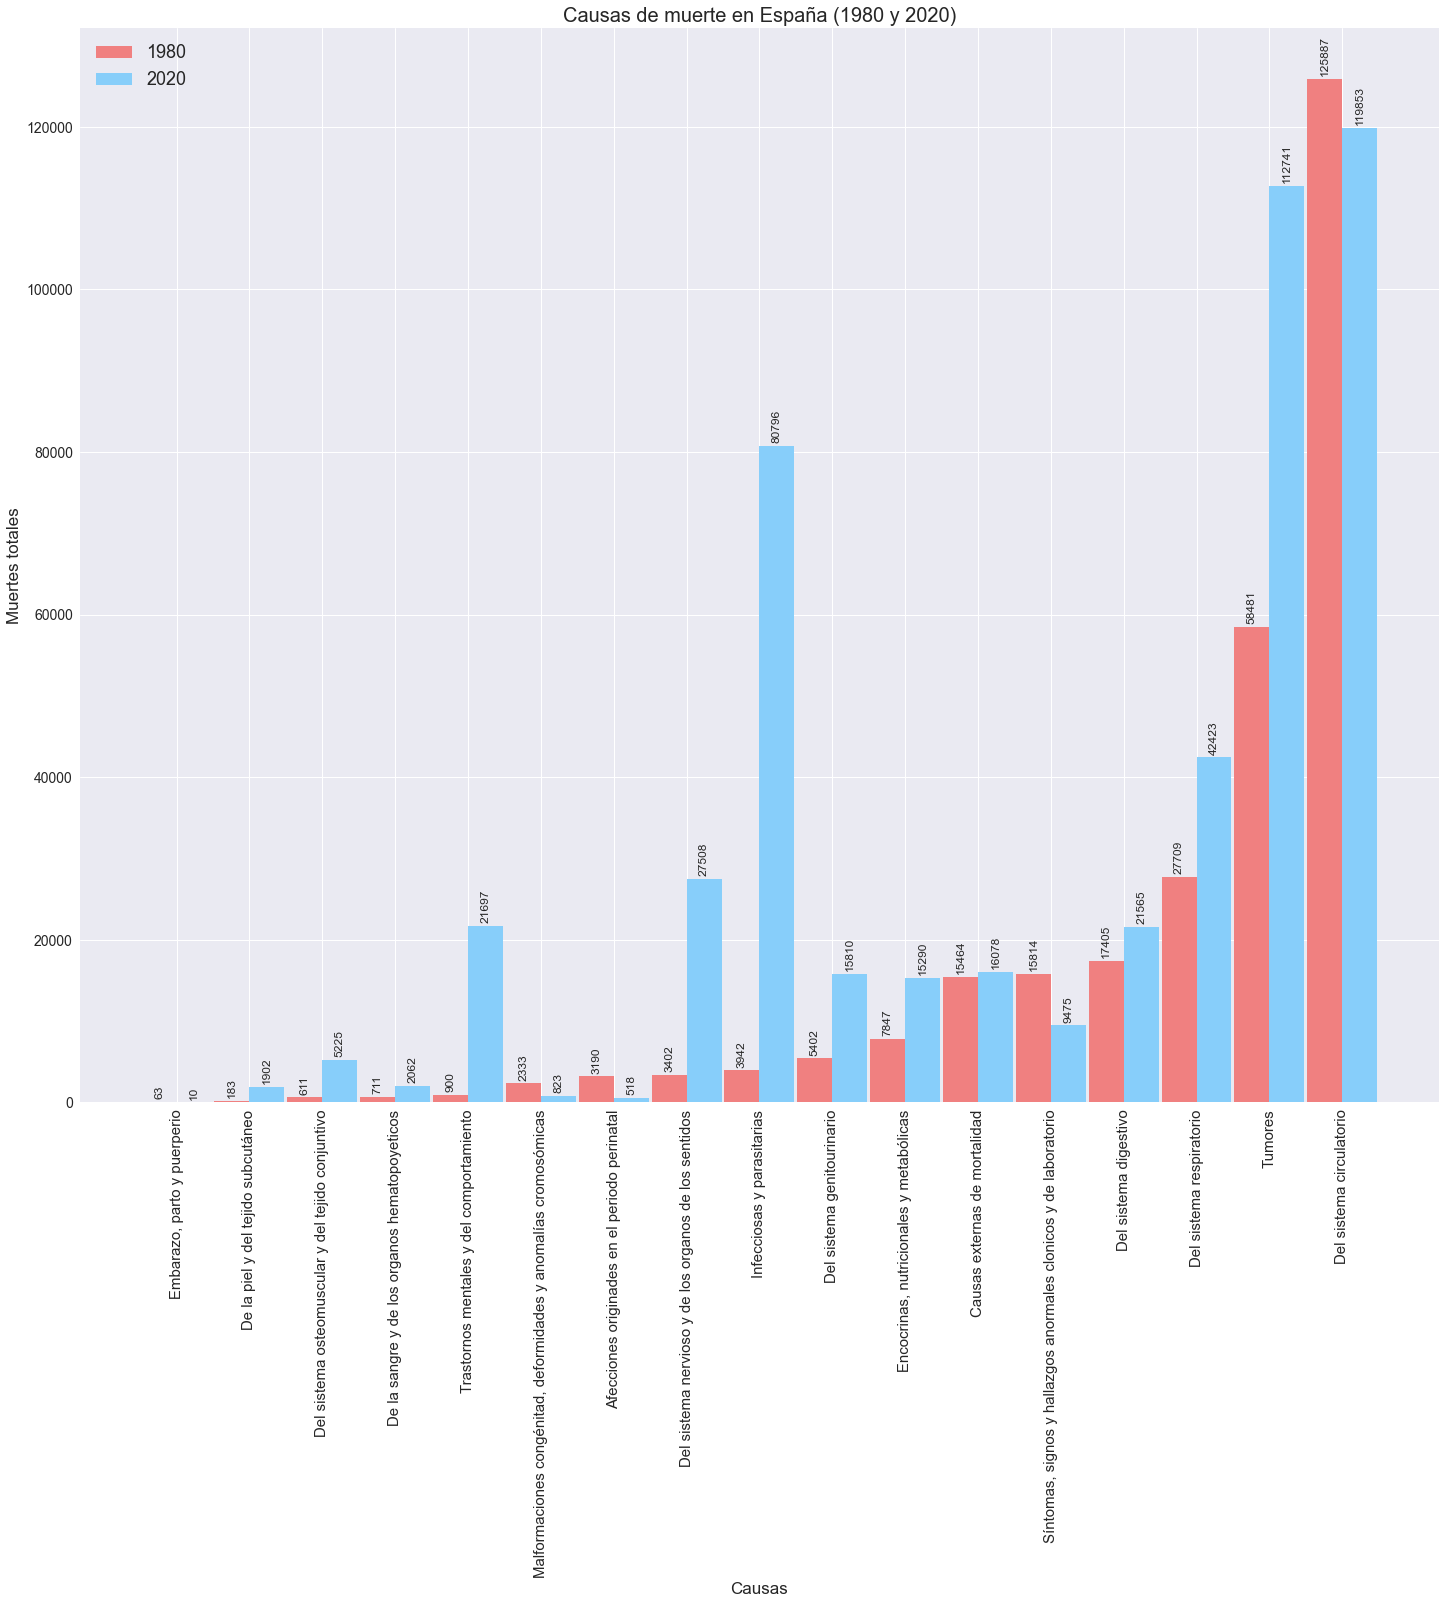

In [31]:
x = np.arange(len(t_c_80_20['Causa']))
width = 0.48

fig, ax = plt.subplots()
fig.set_size_inches(20,16)
rects1 = ax.bar(x - width/2, t_c_80_20['Total_x'], width, label='1980', color='lightcoral')
rects2 = ax.bar(x + width/2, t_c_80_20['Total_y'], width, label='2020', color='lightskyblue')

ax.set_ylabel('Muertes totales', size = 17)
ax.set_xlabel('Causas', size = 17)
ax.set_title('Causas de muerte en España (1980 y 2020)', size = 20)
ax.set_xticks(x, t_c_80_20['Causa'])
ax.legend( loc='upper left', prop={'size': 18}, shadow=True)

ax.bar_label(rects1, padding=3, rotation = 90, size = 12)
ax.bar_label(rects2, padding=3, rotation = 90, size = 12)

fig.tight_layout()

plt.yticks(size = 14)
plt.xticks(rotation=90, size = 15)
plt.show();